# Exploratory Data Analysis

This notebook contains the analysis of the Customer Account Data from January, 2015 to April, 2016. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Loading train accounts
train_accounts = pd.read_csv("data_csv/train/train_accounts.csv")

In [4]:
# Loading monthly info associated with the train accounts
monthly_info = pd.read_csv("data_csv/train/train_monthly_info.csv")

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
columns = monthly_info.columns
columns

Index(['date', 'cust_id', 'employee_index', 'country', 'sex', 'age',
       'open_date', 'last_6_months_flag', 'seniority', 'primary',
       'last_date_primary', 'customer_type', 'customer_relation',
       'domestic_index', 'foreigner_index', 'spouse_index', 'channel',
       'deceased_status', 'primary_address', 'province_code', 'province_name',
       'activity_index', 'gross_income', 'segment'],
      dtype='object')

## Checking missing values

Most of the Machine Learning models cannot deal with missing values in data. As part of pre-processing, it is very important to find out the percentage of missing values for each field and remedy the situation by either filling the gaps or dropping the rows.  

In [8]:
#Finding missing values for each field in the monthly info dataframe

percent_missing = monthly_info.isnull().sum() * 100 / len(monthly_info)

missing = monthly_info.isnull().sum() * 100 / len(monthly_info)
missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': missing})

In [9]:
#Sorting the missing values dataframe in descending order
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df

,column_name,percent_missing
spouse_index,spouse_index,99.986678
last_date_primary,last_date_primary,99.819729
gross_income,gross_income,20.174474
segment,segment,1.433981
channel,channel,1.411049
customer_type,customer_type,1.146372
customer_relation,customer_relation,1.146372
province_name,province_name,0.704624
province_code,province_code,0.704624
sex,sex,0.218617


In [10]:
train_accounts.columns

Index(['date', 'savings_account', 'guarantees', 'current_accounts',
       'derived_account', 'payroll_account', 'junior_account',
       'more_particular_account', 'particular_account',
       'particular_plus_account', 'short_term_deposits',
       'medium_term_deposits', 'long_term_deposits', 'e_account', 'funds',
       'mortgage', 'pensions', 'loans', 'taxes', 'credit_card', 'securities',
       'home_account', 'payroll', 'direct_debt', 'cust_key'],
      dtype='object')

## Checking Class imbalance



In [11]:
idx = train_accounts.groupby(['cust_key'])['date'].transform(max) == train_accounts['date']

In [12]:
unique_customers = train_accounts[idx]

In [13]:
len(unique_customers)

951952

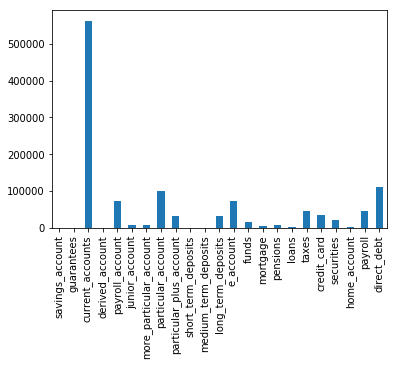

In [14]:
classes = unique_customers.drop(["date", "cust_key"], axis=1)
classes.sum().plot.bar()

## Checking for duplicate rows

In [15]:
df = train_accounts.drop_duplicates(keep='first')

In [16]:
print(len(train_accounts))
print(len(df))

12715856
12715856


In [17]:
df = monthly_info.drop_duplicates(keep='first')

In [18]:
print(len(monthly_info))
print(len(df))

12715856
12715856


In [19]:
monthly_info["cust_id"].nunique()

951952

In [20]:
train_accounts["cust_key"].nunique()

951952

In [55]:
monthly_info.columns

Index(['date', 'cust_id', 'employee_index', 'country', 'sex', 'age',
       'open_date', 'last_6_months_flag', 'seniority', 'primary',
       'last_date_primary', 'customer_type', 'customer_relation',
       'domestic_index', 'foreigner_index', 'spouse_index', 'channel',
       'deceased_status', 'primary_address', 'province_code', 'province_name',
       'activity_index', 'gross_income', 'segment'],
      dtype='object')

## Checking the distribution of continuous variables

In [86]:
# using unique customers df, not the original one

idx = monthly_info.groupby(['cust_id'])['date'].transform(max) == monthly_info['date']
unique_monthly_info = monthly_info[idx]
drop_na_age = unique_monthly_info.dropna(subset=["age"])
# fig = plt.figure(figsize = (20,10))
# ax = fig.gca()
# monthly_info.gross_income.plot(kind="bar",ax=ax)

In [88]:
drop_na_age.age.unique()

array([' NA', ' 70', ' 45', ' 73', ' 34', ' 47', '103', ' 41', ' 11',
       ' 66', ' 44', ' 31', ' 37', ' 33', ' 78', ' 85', ' 30', ' 14',
       ' 19', ' 39', 47, 41, 71, 85, 38, 37, 35, 52, 32, 45, 83, 56, 44,
       36, 87, 33, 61, 49, 78, 20, 90, 59, 12, 40, 57, 43, 51, 68, 46, 84,
       70, 22, 15, 92, 58, 31, 50, 48, 39, 42, 54, 34, 73, 30, 17, 19, 67,
       53, 65, 25, 23, 24, 29, 26, 28, 27, 9, 74, 55, 69, 63, 66, 93, 80,
       72, 60, 89, 82, 77, 102, 91, 81, 76, 95, 16, 97, 64, 75, 7, 21,
       101, 62, 88, 86, 96, 98, 18, 4, 8, 79, 100, 94, 13, 11, 14, 10, 99,
       2, 6, 104, 5, 116, 112, 110, 105, 103, 108, 111, 106, 113, 107,
       114, 3, 127, 164, 109, 117, 115], dtype=object)

In [89]:
drop_na_age = drop_na_age[drop_na_age.age != ' NA']

In [90]:
drop_na_age["age"] = drop_na_age["age"].astype(np.int)

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [91]:
drop_na_age.age.unique()

array([ 70,  45,  73,  34,  47, 103,  41,  11,  66,  44,  31,  37,  33,
        78,  85,  30,  14,  19,  39,  71,  38,  35,  52,  32,  83,  56,
        36,  87,  61,  49,  20,  90,  59,  12,  40,  57,  43,  51,  68,
        46,  84,  22,  15,  92,  58,  50,  48,  42,  54,  17,  67,  53,
        65,  25,  23,  24,  29,  26,  28,  27,   9,  74,  55,  69,  63,
        93,  80,  72,  60,  89,  82,  77, 102,  91,  81,  76,  95,  16,
        97,  64,  75,   7,  21, 101,  62,  88,  86,  96,  98,  18,   4,
         8,  79, 100,  94,  13,  10,  99,   2,   6, 104,   5, 116, 112,
       110, 105, 108, 111, 106, 113, 107, 114,   3, 127, 164, 109, 117,
       115])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x18c506630>]],
      dtype=object)

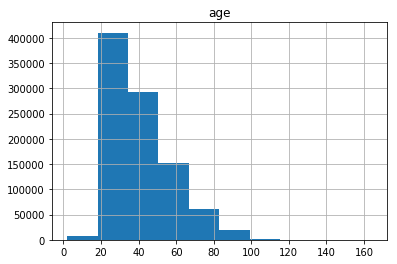

In [92]:
# fig = plt.figure(figsize = (20,10))
# ax = fig.gca()
drop_na_age.hist(column="age")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x153414470>]],
      dtype=object)

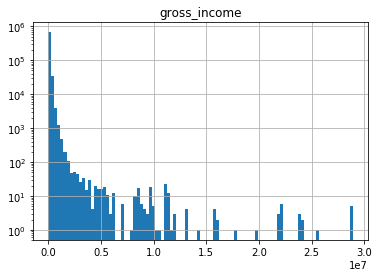

In [93]:
unique_monthly_info.hist(column="gross_income", bins=100, log=True)


In [99]:
drop_na_seniority = unique_monthly_info.dropna(subset=["seniority"])


In [103]:
drop_na_seniority.seniority.unique()

array(['     NA', '    105', '      4', '    104', '    107', '     20',
       '     61', '     10', '    111', '    110', '      3', '      0',
       '    112', 110, 3, 109, 96, 50, 0, 97, 93, 95, 94, 101, 102, 99,
       100, 126, 127, 132, 133, 129, 117, 131, 178, 89, 40, 115, 116, 81,
       113, 114, 121, 120, 1, 36, 122, 4, 118, 6, 55, 53, 17, 56, 49, 8,
       48, 62, 63, 64, 65, 10, 60, 58, 61, 24, 46, 45, 47, 85, 84, 87, 5,
       82, 83, 91, 92, 90, 88, 7, 76, 77, 72, 66, 13, 71, 51, 16, 80, 79,
       78, 9, 185, 180, 170, 181, 191, 188, 186, 190, 173, 2, 156, 171,
       18, 149, 177, 179, 174, 202, 225, 215, 213, 123, 224, 147, 235,
       242, 229, 209, 231, 199, 193, 208, 200, 197, 195, 198, 14, 210,
       205, 207, 112, 150, 152, 151, 148, 125, 157, 154, 155, 137, 135,
       57, 138, 139, 136, 144, 142, 143, 44, 140, 141, 164, 165, 163, 169,
       70, 168, 167, 166, 162, 160, 158, 159, 161, 31, 32, 27, 28, 29, 26,
       30, 33, 22, 23, 21, 25, 43, 42, 41, 39, 19, 

In [104]:
drop_na_seniority = drop_na_seniority[drop_na_seniority.seniority != '     NA']

In [105]:
drop_na_seniority["seniority"] = drop_na_seniority["seniority"].astype(np.int)
drop_na_seniority.seniority.min()

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


-999999

In [110]:
drop_na_seniority[drop_na_seniority["seniority"] == -999999]

,date,cust_id,employee_index,country,sex,age,open_date,last_6_months_flag,seniority,primary,...,foreigner_index,spouse_index,channel,deceased_status,primary_address,province_code,province_name,activity_index,gross_income,segment
11978594,2016-04-28,750561,N,ES,V,37,2016-01-27,0.0,-999999,1.0,...,N,NaN,RED,N,1.0,28.0,MADRID,1.0,NaN,02 - PARTICULARES
12041260,2016-04-28,138388,N,ES,V,52,1999-07-16,0.0,-999999,1.0,...,N,NaN,004,N,1.0,28.0,MADRID,1.0,198122.16,01 - TOP
12111000,2016-04-28,162278,N,ES,V,67,2005-06-08,0.0,-999999,1.0,...,N,NaN,004,N,1.0,28.0,MADRID,0.0,173862.36,02 - PARTICULARES


In [111]:
drop_na_seniority = drop_na_seniority[drop_na_seniority.seniority != -999999]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x189200978>]],
      dtype=object)

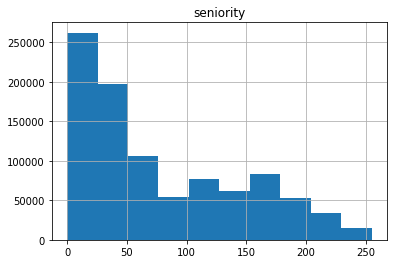

In [116]:
drop_na_seniority.hist(column="seniority", bins=10)

## Unique Values in each field

In [115]:
monthly_info["segment"].unique()

array(['02 - PARTICULARES', '03 - UNIVERSITARIO', nan, '01 - TOP'],
      dtype=object)

In [117]:
monthly_info["sex"].unique()

array(['H', 'V', nan], dtype=object)

In [118]:
monthly_info["last_6_months_flag"].unique()

array([ 0., nan,  1.])

In [119]:
monthly_info["primary"].unique()

array([ 1., nan, 99.])

In [120]:
monthly_info["customer_type"].unique()

array([1.0, nan, 3.0, 2.0, '1', '1.0', '3.0', '2.0', '3', '4.0', 'P', '4',
       '2', 4.0], dtype=object)

In [121]:
monthly_info["customer_relation"].unique()

array(['A', 'I', nan, 'P', 'R', 'N'], dtype=object)

In [122]:
monthly_info["domestic_index"].unique()

array(['S', nan, 'N'], dtype=object)

In [123]:
monthly_info["foreigner_index"].unique()

array(['N', 'S', nan], dtype=object)

In [124]:
monthly_info["channel"].unique()

array(['KHL', 'KHE', 'KHD', 'KFA', 'KFC', 'KAT', nan, 'KAZ', 'RED', 'KHC',
       'KHK', 'KGN', 'KHM', 'KHO', 'KDH', 'KEH', 'KAD', 'KBG', 'KGC',
       'KHF', 'KFK', 'KHN', 'KHA', 'KAF', 'KGX', 'KFD', 'KAG', 'KFG',
       'KAB', 'KCC', 'KAE', 'KAH', 'KAR', 'KFJ', 'KFL', 'KAI', 'KFU',
       'KAQ', 'KFS', 'KAA', 'KFP', 'KAJ', 'KFN', 'KGV', 'KGY', 'KFF',
       'KAP', 'KDE', 'KFV', '013', 'K00', 'KAK', 'KCK', 'KCL', 'KAY',
       'KBU', 'KDR', 'KAC', 'KDT', 'KCG', 'KDO', 'KDY', 'KBQ', 'KDA',
       'KBO', 'KCI', 'KEC', 'KBZ', 'KES', 'KDX', 'KAS', '007', 'KEU',
       'KCA', 'KAL', 'KDC', 'KAW', 'KCS', 'KCB', 'KDU', 'KDQ', 'KCN',
       'KCM', '004', 'KCH', 'KCD', 'KCE', 'KEV', 'KBL', 'KEA', 'KBH',
       'KDV', 'KFT', 'KEY', 'KAO', 'KEJ', 'KEO', 'KEI', 'KEW', 'KDZ',
       'KBV', 'KBR', 'KBF', 'KDP', 'KCO', 'KCF', 'KCV', 'KAM', 'KEZ',
       'KBD', 'KAN', 'KBY', 'KCT', 'KDD', 'KBW', 'KCU', 'KBX', 'KDB',
       'KBS', 'KBE', 'KCX', 'KBP', 'KBN', 'KEB', 'KDS', 'KEL', 'KDG',
       'KDF', '

In [125]:
monthly_info["deceased_status"].unique()

array(['N', nan, 'S'], dtype=object)

In [126]:
monthly_info["primary_address"].unique()

array([ 1., nan])

In [131]:
monthly_info["province_code"].unique()

array([29., 13., 50., 45., 24., 20., 10., 17., 49.,  8., 37.,  9., 22.,
       31.,  5., 40., 27., 25., 28.,  3., 42., 41., 39.,  7., 47., 36.,
       46., 44., 15., 32., 23., 16., 48., 12., 26.,  2.,  6., 30., 11.,
       nan,  4., 19., 34., 35., 14., 21., 18., 33., 38., 52., 43.,  1.,
       51.])

In [129]:
monthly_info["province_name"].nunique()

52

In [132]:
monthly_info["activity_index"].unique()

array([ 1.,  0., nan])

In [5]:
monthly_info["country"].unique()

array(['ES', nan, 'CA', 'CH', 'CL', 'IE', 'AT', 'NL', 'FR', 'GB', 'DE',
       'DO', 'BE', 'AR', 'VE', 'US', 'MX', 'BR', 'IT', 'EC', 'PE', 'CO',
       'HN', 'FI', 'SE', 'AL', 'PT', 'MZ', 'CN', 'TW', 'PL', 'IN', 'CR',
       'NI', 'HK', 'AD', 'CZ', 'AE', 'MA', 'GR', 'PR', 'RO', 'IL', 'RU',
       'GT', 'GA', 'NO', 'SN', 'MR', 'UA', 'BG', 'PY', 'EE', 'SV', 'ET',
       'CM', 'SA', 'CI', 'QA', 'LU', 'PA', 'BA', 'BO', 'AU', 'BY', 'KE',
       'SG', 'HR', 'MD', 'SK', 'TR', 'AO', 'CU', 'GQ', 'EG', 'ZA', 'DK',
       'UY', 'GE', 'TH', 'DZ', 'LB', 'JP', 'NG', 'PK', 'TN', 'TG', 'KR',
       'GH', 'RS', 'VN', 'PH', 'KW', 'NZ', 'MM', 'KH', 'GI', 'SL', 'GN',
       'GW', 'OM', 'CG', 'LV', 'LT', 'ML', 'MK', 'HU', 'IS', 'LY', 'CF',
       'GM', 'KZ', 'CD', 'BZ', 'ZW', 'DJ', 'JM', 'BM', 'MT'], dtype=object)

In [20]:
monthly_info.groupby("segment").size()

segment
01 - TOP               526727
02 - PARTICULARES     7417624
03 - UNIVERSITARIO    4589162
dtype: int64

In [23]:
monthly_info["employee_index"].unique()

array(['N', nan, 'A', 'B', 'F', 'S'], dtype=object)

## Observations

- There's a class imbalance. The number of customers with "current_account" is much higher than all the other account holder customer.

- More than 99% of the values in spouse_index and last_date_primary columns are null. Therefore, it'll be better to just drop the columns while preprocessing the data.

- There are missing values in most of other fields, however the percentage is much lower and thus can be fixed.

- Fields like seniority, age and customer_accounts have inconsistent data types e.g. 1.0 and '1.0', which will have to be fixed before giving to the model.

- There's a one to one mapping between province code and province name, so it'll be better to use one of the fields.

- Primary address field just have one value in it, it won't be informative while getting predictions, so the column can be dropped.

- Seniority has noise values like '-99999' which maye skew the data. A decision will have to be made to whether keep it or drop it.
